In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
np.random.seed(1)

In [13]:
n = 400
X1 = np.concatenate((np.random.normal(1, 1, n//2), np.random.normal(-1, 1, n//2)))
X2 = np.random.normal(0, 1, n)
Y = np.concatenate((np.repeat(1, n//2), np.repeat(0, n//2)))
beta_1_star = 5
beta_2_star = -1

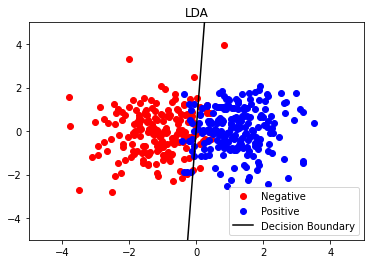

False positive rate: 0.06842105263157895
False negative rate: 0.0761904761904762


In [15]:
prob = np.exp(beta_1_star*X1 + beta_2_star*X2) / (1 + np.exp(beta_1_star*X1 + beta_2_star*X2))
Y = np.random.binomial(1, prob, n)

mu_0 = np.array([np.mean(X1[Y == 0]), np.mean(X2[Y == 0])])
mu_1 = np.array([np.mean(X1[Y == 1]), np.mean(X2[Y == 1])])

cov_0 = np.cov(X1[Y == 0], X2[Y == 0])
cov_1 = np.cov(X1[Y == 1], X2[Y == 1])

pooled_cov = (cov_0*(sum(Y == 0)-1) + cov_1*(sum(Y == 1)-1)) / (n-2)

w = np.linalg.solve(pooled_cov, mu_1 - mu_0)
w0 = -0.5*np.dot(w, (mu_0 + mu_1))

plt.scatter(X1[Y==0], X2[Y==0], c='red', marker='o', label='Negative')
plt.scatter(X1[Y==1], X2[Y==1], c='blue', marker='o', label='Positive')

x = np.linspace(-5, 5, 100)
y = -(w[0]/w[1])*x - w0/w[1]

plt.plot(x, y, c='black', label='Decision Boundary')
plt.legend(loc='lower right')
plt.title('LDA')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

z = np.dot(w, np.vstack((X1, X2))) + w0
y_pred = (z > 0).astype(int)
tp = np.sum((Y == 1) & (y_pred == 1))
tn = np.sum((Y == 0) & (y_pred == 0))
fp = np.sum((Y == 0) & (y_pred == 1))
fn = np.sum((Y == 1) & (y_pred == 0))
FPR = fp/(fp+tn)
FNR = fn/(tp+fn)

print("False positive rate:", FPR)
print("False negative rate:", FNR)